In [48]:
import numpy as np
import scipy.linalg
import random
import networkx as nx
import matplotlib.pyplot as plt
import planarity

In [49]:
def rand_adj_mat(size=2):
    m = np.zeros([size,size])
    for i in range(size):
        for j in range(i):
            b = int(random.random()< .01)
            m[i,j] = b
            m[j,i] = b
    return m


def rand_conn_adj_mat(size=2):
    x  = 0
    while x == 0:
        m = rand_adj_mat(size)
        x = np.prod(scipy.linalg.eigvals(m)[0])
    return m

def rand_conn_er(size,p):
    c = False
    while not c:    
        m = nx.fast_gnp_random_graph(size,p)
        c = nx.is_connected(m)
    return nx.adjacency_matrix(m)

def rand_conn_nm(n,e):
    c = False
    while not c:
        m = nx.gnm_random_graph(n,e)
        c = nx.is_connected(m)
    print(planarity.is_planar(m))
    return nx.adjacency_matrix(m)

In [51]:

dist = np.loadtxt('adj_mats/42_4218_dist.txt',delimiter=',')


lap_d  = np.diag(dist.sum(axis=0)) - dist
n=dist.shape[0]
h = []

for i in range(500):
    if i%10==0: print(i)
    adj = rand_conn_adj_mat(dist.shape[0])
    deg = np.diag(adj.sum(axis=0))
    lap = deg - adj
    evals = np.real(scipy.linalg.eigvals(lap).tolist())
    evals = [e for e in evals if e>.1]
    for l in evals: h.append(l)



0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490


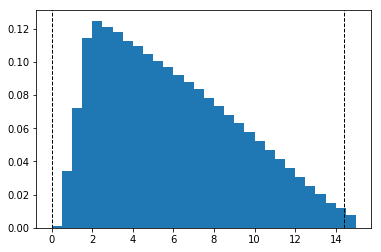

In [52]:
plt.hist(h,density=True,bins=30, range=[0,15])
d_e = np.real(scipy.linalg.eigvals(lap_d))
random.shuffle(d_e)

plt.axvline(min(d_e), color='k', linestyle='dashed', linewidth=1)
plt.axvline(max(d_e), color='k', linestyle='dashed', linewidth=1)

